In [24]:
import serial
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
from statistics import mean


In [25]:
# Choose txt directory
txt_dir = 'C:/Users/aepju/Documents/MSc/06_Classes/Chem_411/Ass2'


# Store the selected file paths in a list
txt_list = glob.glob(f'{txt_dir}/*.txt')
txt_list.sort()

# Make a list of DataFrames
df_list = []
files = []
for i, file_path in enumerate(txt_list):
    file_name = os.path.basename(file_path)
    files.append(file_name)
    
    # Read the CSV file and append the DataFrame to the list
    df = pd.read_table(file_path)
    df_list.append(df)
    
    print('{:02d}: {}'.format(i+1, file_name))

01: sensorData.txt


In [106]:
file_ID = 1 # Choose file from directory

# Check file name
print(files[file_ID-1])
# Read the data
df_plot = df_list[file_ID-1]

# Prepare variables
x = df_plot['#time'].to_list()
y = df_plot['#Temp (°C)'].to_list()
z = df_plot['#Rel Hum (%)'].to_list()


sensorData.txt


In [154]:
#Math and string setup
larger_value_temp = max(y)
smaller_value_temp = min(y)
average_temp = mean(y)

larger_value_hum = max(z)
smaller_value_hum = min(z)
average_hum = mean(z)

info_temp = 'Maximum temperature = ' + str(larger_value_temp) + '°C, Minimum temperature = ' + str(smaller_value_temp) + '°C, Average temperature = {:.1f}'.format(average_temp) + '°C'
info_hum = 'Maximum humidity = ' + str(larger_value_hum) + '%, Minimum humidity = ' + str(smaller_value_hum) + '%, Average humidity = {:.0f}'.format(average_hum) + '%'



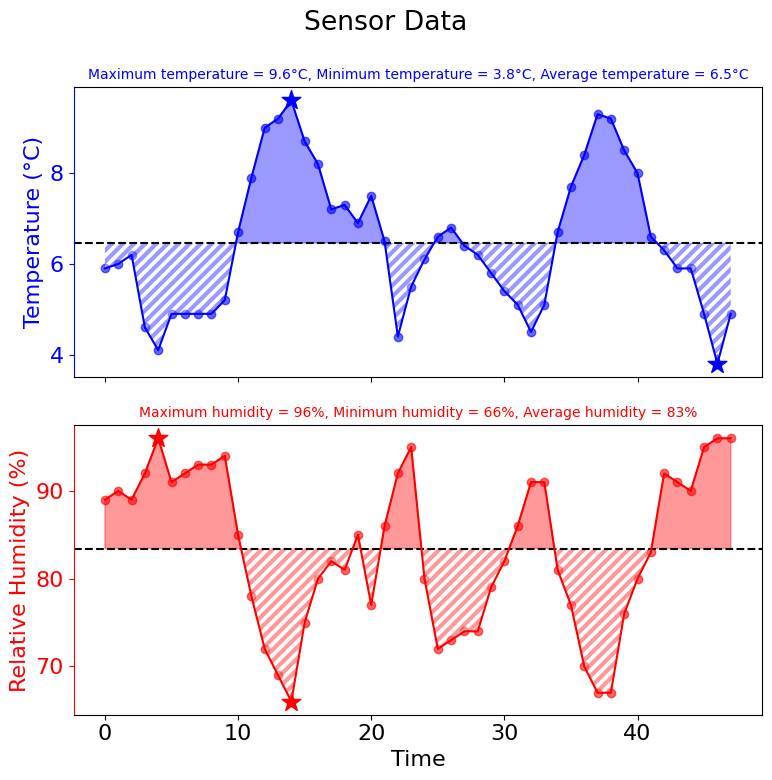

In [153]:
#Plotting

# Make a figure
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 8))
plt.rcParams["figure.autolayout"] = True
plt.rcParams["font.size"] = 16
fig.suptitle('Sensor Data')

# Plot Temperature
ax[0].axhline(average_temp, color = 'black', linestyle = 'dashed')  
ax[0].plot(x, y, linestyle='-', label=None, color='blue')
ax[0].scatter(x, y, color='blue', alpha=0.6)
ax[0].scatter(x[np.argmin(y)], y[np.argmin(y)], color='blue', marker='*',s=200, alpha=1)
ax[0].scatter(x[np.argmax(y)], y[np.argmax(y)], color='blue', marker='*',s=200, alpha=1)

ax[0].spines["left"].set_color("blue")
ax[0].tick_params(axis="y", colors="blue")
ax[0].fill_between(x, y, average_temp, where=np.array(y) >= average_temp, interpolate=True, color='blue', alpha=0.4)
ax[0].fill_between(x, y, average_temp, where=np.array(y) < average_temp, interpolate=True, color='white', alpha=0.4, hatch="///",hatch_linewidth=3, edgecolor="blue",linewidth=0 )

ax[0].set_ylabel('Temperature (°C)', color='blue')
ax[0].set_title(info_temp, fontsize=10, color='blue')


# Plot Humidity
ax[1].axhline(average_hum, color = 'black', linestyle = 'dashed') 
 

ax[1].plot(x, z, linestyle='-', label=None, color='red')
ax[1].scatter(x, z, color='red', alpha=0.6)
ax[1].scatter(x[np.argmin(z)], z[np.argmin(z)], color='red', marker='*',s=200, alpha=1)
ax[1].scatter(x[np.argmax(z)], z[np.argmax(z)], color='red', marker='*',s=200, alpha=1)

ax[1].spines["left"].set_color("red")
ax[1].tick_params(axis="y", colors="red")
ax[1].fill_between(x, z, average_hum, where=np.array(z) >= average_hum, interpolate=True, color='red', alpha=0.4)
ax[1].fill_between(x, z, average_hum, where=np.array(z) < average_hum, interpolate=True, color='white', alpha=0.4, hatch="///",hatch_linewidth=3, edgecolor="red",linewidth=0 )

ax[1].set_xlabel('Time')
ax[1].set_ylabel('Relative Humidity (%)', color='red')
ax[1].set_title(info_hum, fontsize=10, color='red')


plt.savefig('Ass2_figure.png',transparent=True, dpi=1200, bbox_inches='tight')
plt.show()



In [ ]:
# Answer to Question 3

# I am not that familiar with filters.
# When looking at scipy.filter documentation, one that seemed reasonable is the butterworth filter (scipy.filter.butter).
# A lot of the filters seemed to be for two dimensional data and images.
# Another one that seemed interesting is the wiener filter (scipy.filter.wiener)
